## 🥋 Training Base Models on Wine Quality Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [2]:
# Loading the datasets
train = pd.read_csv("../dataset/wine-train-balanced.csv")
print(train.shape)
test = pd.read_csv("../dataset/wine-test.csv")
print(test.shape)

(6898, 13)
(1064, 13)


In [3]:
train.sample(7)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_type,quality
2296,6.600000,0.270000,0.290000,5.300000,0.045000,57.000000,189.000000,0.995300,3.310000,0.790000,9.800000,1,0
6299,7.872011,0.379913,0.350173,1.866378,0.070620,21.663778,55.000000,0.994870,3.379133,0.760260,11.431456,0,1
992,6.100000,0.260000,0.510000,2.200000,0.050000,61.000000,154.000000,0.992900,3.080000,0.600000,9.800000,1,0
1542,6.200000,0.330000,0.410000,16.800000,0.037000,58.000000,173.000000,0.998820,3.250000,0.570000,9.400000,1,0
3944,7.700000,0.410000,0.760000,1.800000,0.611000,8.000000,45.000000,0.996800,3.060000,1.260000,9.400000,0,0
5952,6.657794,0.228899,0.292385,1.382570,0.034413,16.412849,83.880727,0.990666,3.220184,0.425321,11.129358,1,1
2835,7.600000,0.320000,0.250000,9.500000,0.030000,15.000000,136.000000,0.993670,3.100000,0.440000,12.100000,1,0


In [4]:
test.sample(7)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_type,quality
1041,6.4,0.33,0.31,5.5,0.048,42.0,173.0,0.99510,3.19,0.66,9.3,1,0
158,7.1,0.22,0.33,2.8,0.033,48.0,153.0,0.98990,3.15,0.38,12.7,1,1
1025,5.7,0.15,0.47,11.4,0.035,49.0,128.0,0.99456,3.03,0.34,10.5,1,1
598,13.2,0.46,0.52,2.2,0.071,12.0,35.0,1.00060,3.10,0.56,9.0,0,0
963,8.2,0.74,0.09,2.0,0.067,5.0,10.0,0.99418,3.28,0.57,11.8,0,0
595,7.4,0.24,0.40,4.3,0.032,9.0,95.0,0.99200,3.09,0.39,11.1,1,0
807,6.8,0.26,0.40,7.5,0.046,45.0,179.0,0.99583,3.20,0.49,9.3,1,0


In [5]:
# Separating training and test sets into features and labels
X_train, y_train = train.drop(["quality"], axis=1), train["quality"]
X_test, y_test = test.drop(["quality"], axis=1), test["quality"]

In [6]:
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (6898, 12) (6898,)
Test shape: (1064, 12) (1064,)


### Random Forest Model

I'll start by training a RandomForest model on the training set. Although, already an ensemble, this would be one of the base models I would use to build my custom ensemble.

In [7]:
rf_classifier = RandomForestClassifier(n_estimators=20, max_depth=10, criterion="entropy", random_state=33)
rf_classifier.fit(X_train, y_train)

,n_estimators,20
,criterion,'entropy'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
rf_preds = rf_classifier.predict(X_test)

print("Random Forest Test Accuracy: {:.4f}".format(accuracy_score(y_test, rf_preds)))

Random Forest Test Accuracy: 0.7998


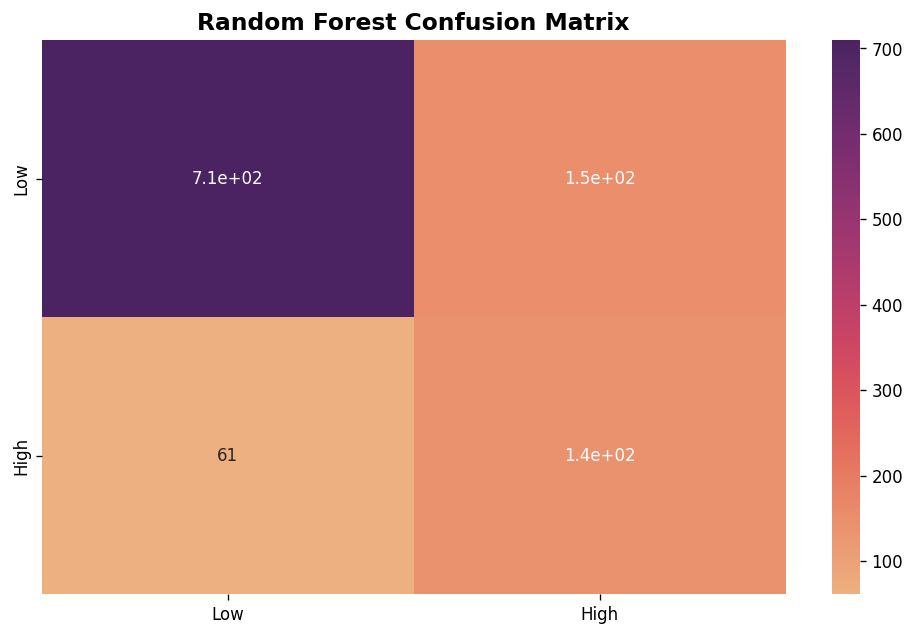

In [9]:
class_names = ["Low", "High"]
cm = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(10, 6), dpi=120)
sns.heatmap(
    cm,
    annot=True,
    xticklabels=class_names,
    yticklabels=class_names,
    cmap="flare"
)

plt.title("Random Forest Confusion Matrix", fontsize=14, fontweight="bold")
plt.savefig("../img/rf-confusion-matrix.png")
plt.show()


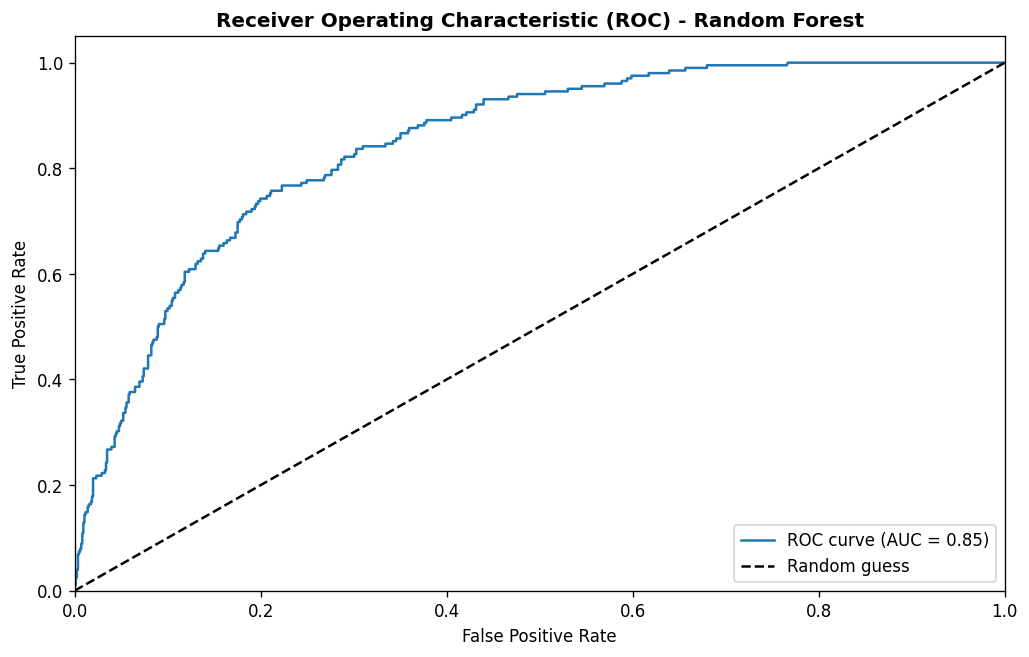

In [10]:
# Visualizing ROC-AUC for Random Forest Model
# Array of predicted probabilities for the positive class
y_score_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score_rf)

# Compute the Area Under the Curve (AUC)
auc_score = roc_auc_score(y_test, y_score_rf)

# Plot
plt.figure(figsize=(10, 6), dpi=120)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) - Random Forest", fontweight="bold")
plt.legend(loc="lower right")

plt.savefig("../img/rf_roc_auc.png")
plt.show()

### LightGBM Model

This would be another model that would be combined to create the custom ensemble

In [12]:
lgbm_clf = LGBMClassifier(n_estimators=50, learning_rate=0.01, random_state=33)
lgbm_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3449, number of negative: 3449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2806
[LightGBM] [Info] Number of data points in the train set: 6898, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.01
,n_estimators,50
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [13]:
lgbm_preds = lgbm_clf.predict(X_test)
print("LightGBM Test Accuary: {:.4f}".format(accuracy_score(y_test, lgbm_preds)))

LightGBM Test Accuary: 0.7801


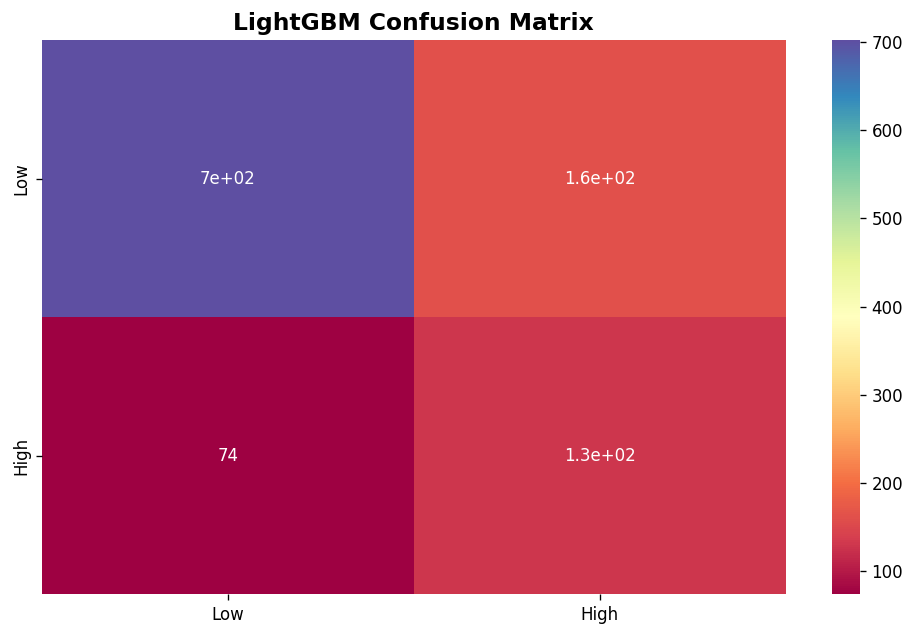

In [14]:
cm = confusion_matrix(y_test, lgbm_preds)

plt.figure(figsize=(10, 6), dpi=120)
sns.heatmap(
    cm,
    annot=True,
    xticklabels=class_names,
    yticklabels=class_names,
    cmap="Spectral"
)

plt.title("LightGBM Confusion Matrix", fontsize=14, fontweight="bold")
plt.savefig("../img/lgbm-confusion-matrix.png")
plt.show()

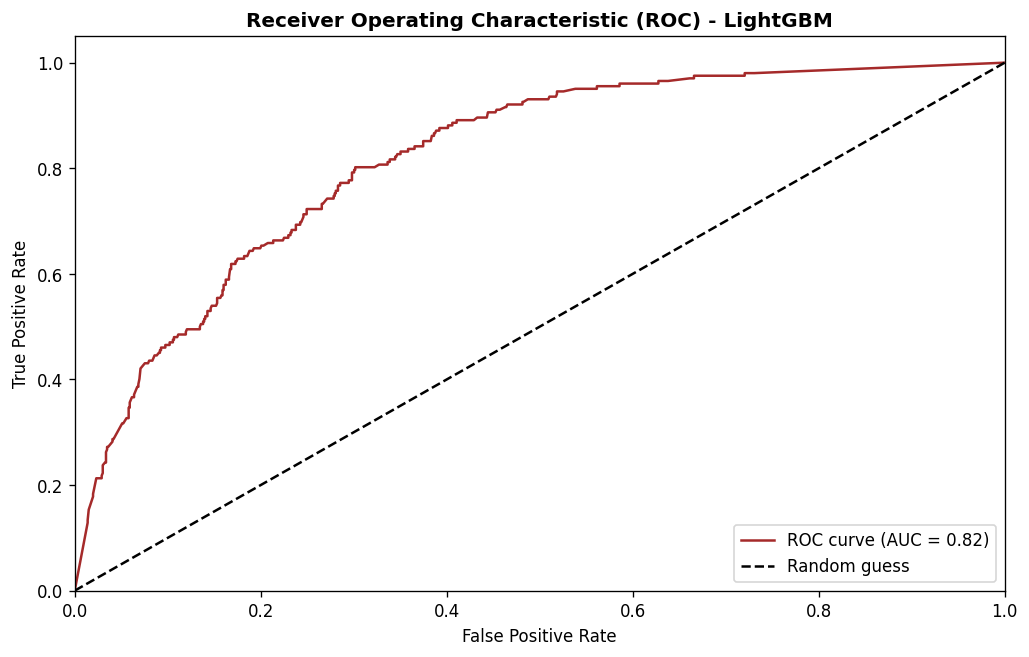

In [15]:
# Visualizing ROC-AUC for optimized Random Forest Model
# Array of predicted probabilities for the positive class
y_score_lgbm = lgbm_clf.predict_proba(X_test)[:, 1]

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score_lgbm)

# Compute the Area Under the Curve (AUC)
auc_score = roc_auc_score(y_test, y_score_lgbm)

# Plot
plt.figure(figsize=(10, 6), dpi=120)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.2f})", color="brown")
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) - LightGBM", fontweight="bold")
plt.legend(loc="lower right")

plt.savefig("../img/lgbm_roc_auc.png")
plt.show()

In another experiment, I would finetune the hyperparameters of these models to get the best paramters for the data, and then use this parameters to train the models and build the ensemble with them.

In [ ]:
# Saving both modelsS
import pickle

with open("../artifacts/rf_base_v1.pkl", "wb") as file:
    pickle.dump(rf_classifier, file)

with open("../artifacts/lgbm_base_V1.pkl", "wb") as file:
    pickle.dump(lgbm_clf, file)